
## YouTube Channels Analysis

This notebook contains a comprehensive analysis of the Top 1000 YouTube Channels dataset.


## About Dataset

YouTube is the world's largest video-sharing platform, launched in 2005. It allows users to upload, view, and share videos, and has grown to be a central hub for content creators across various fields, including entertainment, education, music, and more. With over 2 billion logged-in users monthly, YouTube has become an essential platform for digital content and marketing.

The Top 1000 YouTube Channels Dataset captures detailed information about the top-performing YouTube channels globally. This dataset includes the following columns:

**Rank** : The ranking of the YouTube channel based on its overall popularity and performance.

**Youtuber** : The name of the YouTuber or the title of the YouTube channel.

**Subscribers** : The total number of subscribers to the channel, indicating its reach and popularity.

**Video** **Views** : The total number of video views the channel has accumulated, reflecting its engagement and audience interaction.

**Video** **Count** : The total number of videos uploaded by the channel, showing the content volume produced.

**Category** : The genre or category the channel belongs to, such as music, education, entertainment, etc.

**Started** : The year the channel was created, providing insight into its longevity and growth over time.


This dataset is invaluable for analyzing trends, understanding content strategies, and benchmarking channel performances within the YouTube ecosystem.

## Importing Required Libraries and Datatset

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud.wordcloud import WordCloud

file_path = 'data/Top Youtubers Dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')

df.head()

,Rank,Youtuber,Subscribers,Video Views,Video Count,Category,Started
0,1,MrBeast,284000000,5.240290e+10,803,Entertainment,2012
1,2,T-Series,268000000,2.586240e+11,21237,Music,2006
2,3,YouTube Movies,181000000,0.000000e+00,0,Film & Animation,2015
3,4,Cocomelon - Nursery Rhymes,177000000,1.828810e+11,1188,Education,2006
4,5,SET India,174000000,1.653950e+11,139720,Shows,2006


## Data Preprocessing

In [17]:
df = df.dropna(subset=['Category', 'Subscribers', 'Video Views', 'Video Count', 'Started'])
X = df[['Video Views', 'Video Count', 'Started', 'Category']]
y = df['Subscribers']

## Model Training

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Category'])
    ],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Model Evaluation

In [19]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 5884130.795122079
R-squared: 0.39946918036322265


## Scatter plot of predictions

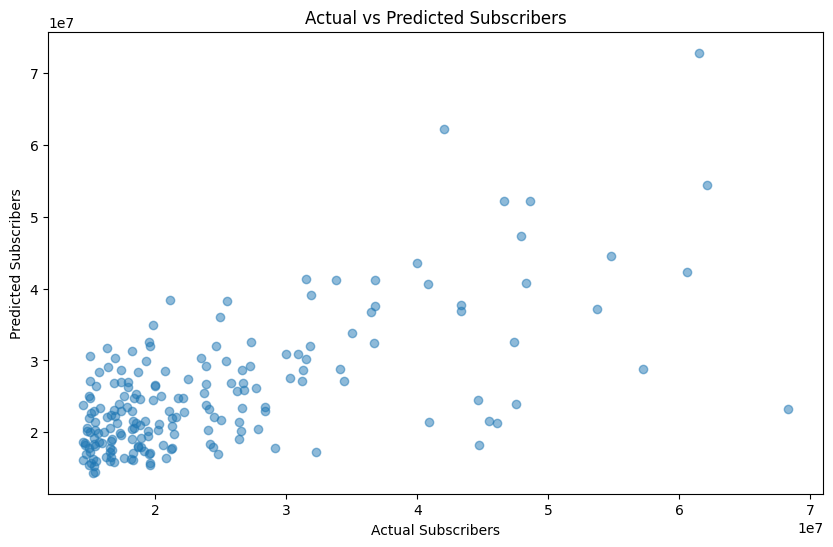

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Subscribers')
plt.xlabel('Actual Subscribers')
plt.ylabel('Predicted Subscribers')
plt.show()

## Visualization

### Most Popular Categories

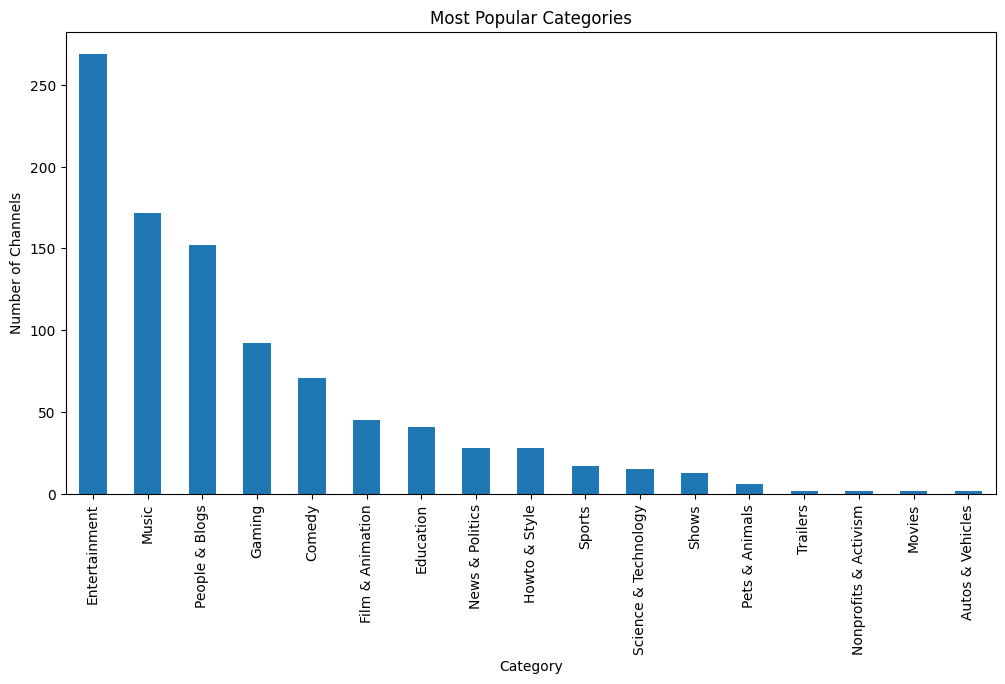

In [4]:
category_counts = df['Category'].value_counts()
category_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Most Popular Categories')
plt.xlabel('Category')
plt.ylabel('Number of Channels')
plt.show()

### Correlation between Subscribers and Video Views

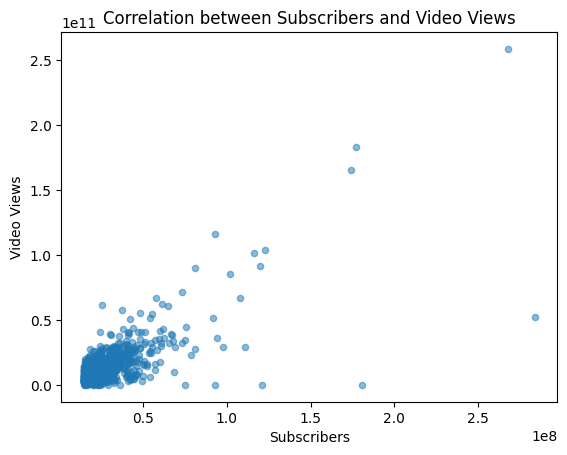

In [5]:

df.plot(kind='scatter', x='Subscribers', y='Video Views', alpha=0.5)
plt.title('Correlation between Subscribers and Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.show()


### Channels Started Over the Years

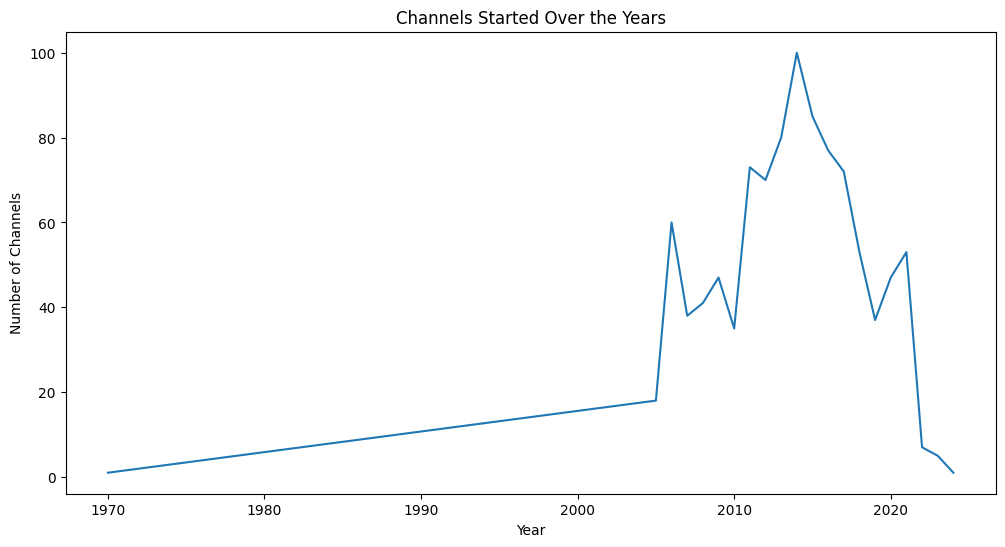

In [6]:
start_years = df['Started'].value_counts().sort_index()
start_years.plot(kind='line', figsize=(12, 6))
plt.title('Channels Started Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Channels')
plt.show()


### Top 10 Channels by Subscribers

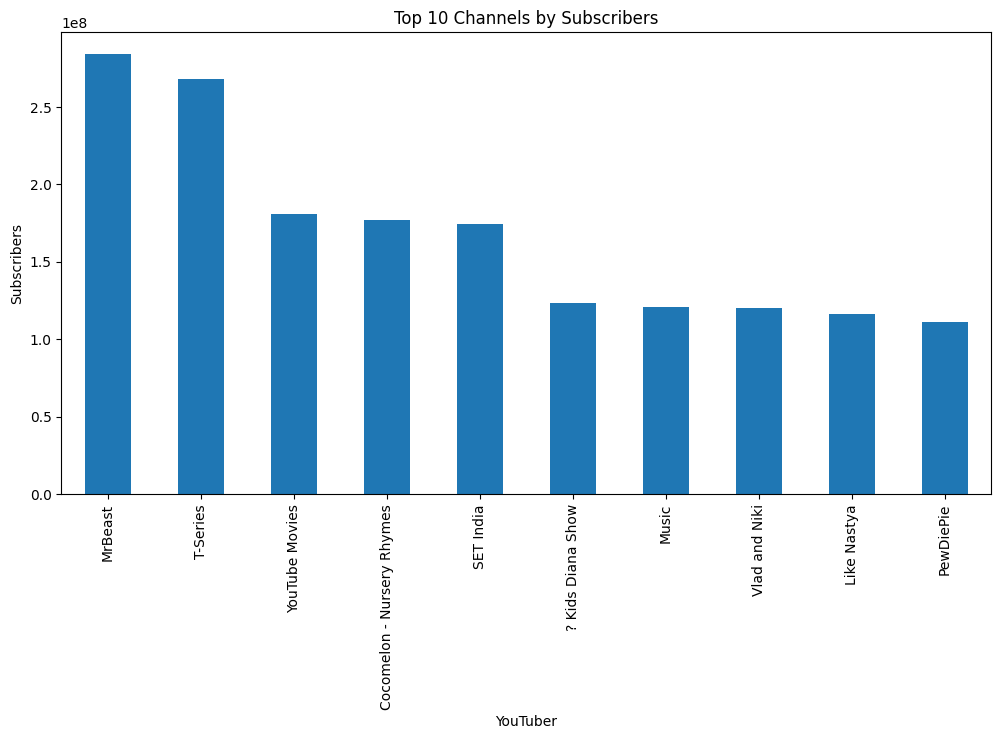

In [7]:
top_channels = df.nlargest(10, 'Subscribers')[['Youtuber', 'Subscribers']]
top_channels.plot(kind='bar', x='Youtuber', y='Subscribers', legend=False, figsize=(12, 6))
plt.title('Top 10 Channels by Subscribers')
plt.xlabel('YouTuber')
plt.ylabel('Subscribers')
plt.show()


### Distribution of Video Counts

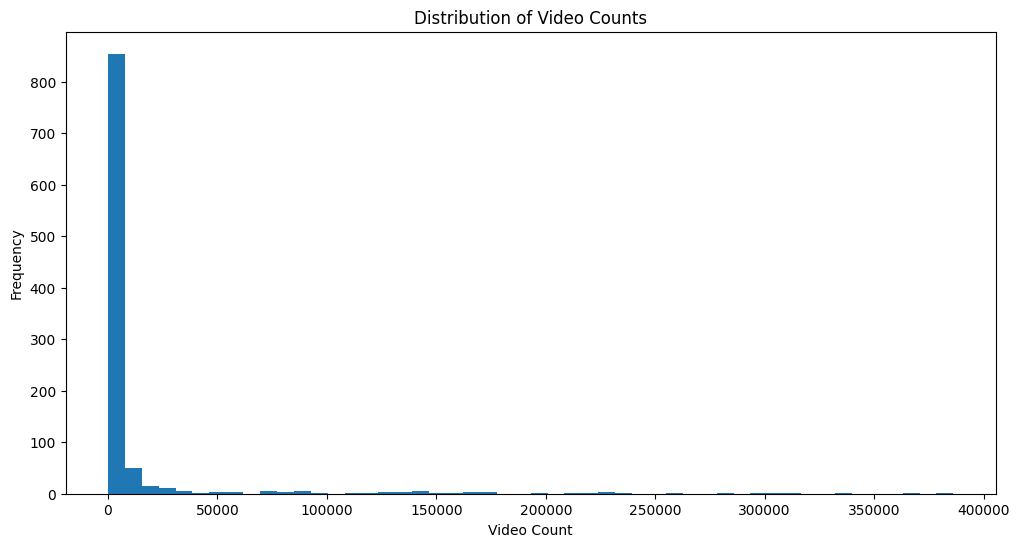

In [8]:
df['Video Count'].plot(kind='hist', bins=50, figsize=(12, 6))
plt.title('Distribution of Video Counts')
plt.xlabel('Video Count')
plt.ylabel('Frequency')
plt.show()

### Average Subscribers and Video Views by Category

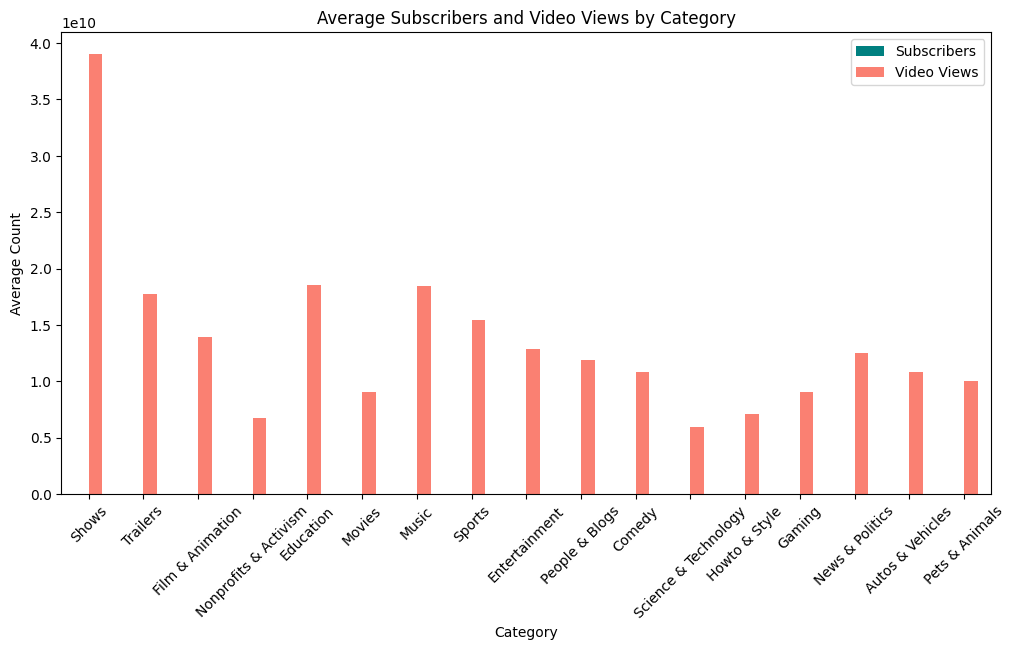

In [9]:
category_avg = df.groupby('Category')[['Subscribers', 'Video Views']].mean().sort_values(by='Subscribers', ascending=False)
category_avg.plot(kind='bar', figsize=(12, 6), color=['teal', 'salmon'])
plt.title('Average Subscribers and Video Views by Category')
plt.xlabel('Category')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.show()


### Top 10 Categories by Average Subscribers

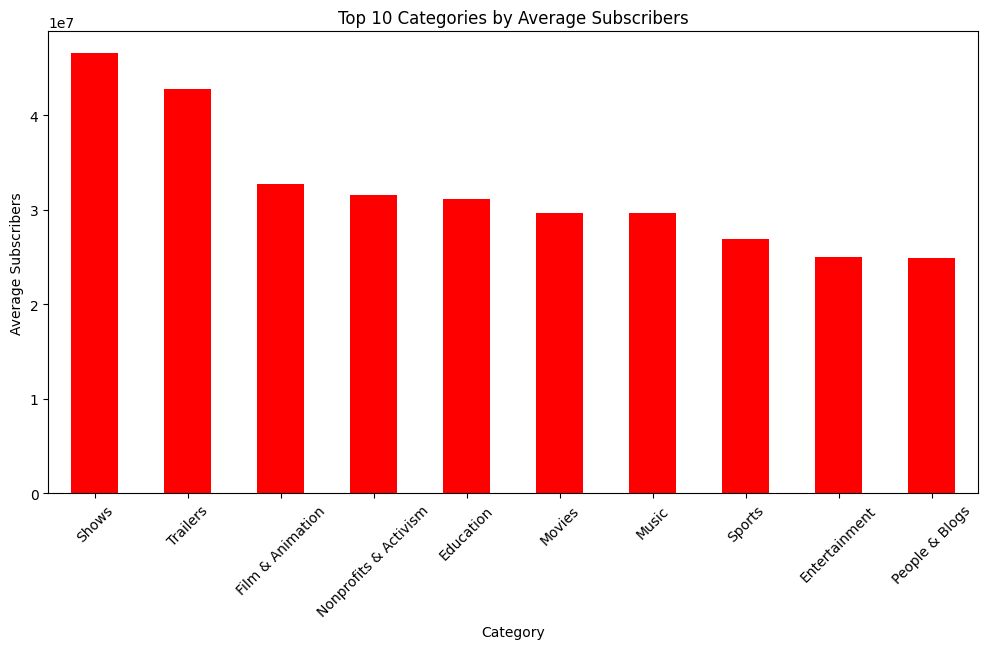

In [10]:
top_categories = category_avg.nlargest(10, 'Subscribers')
top_categories['Subscribers'].plot(kind='bar', figsize=(12, 6), color='red')
plt.title('Top 10 Categories by Average Subscribers')
plt.xlabel('Category')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=45)
plt.show()


### Correlation Heatmap

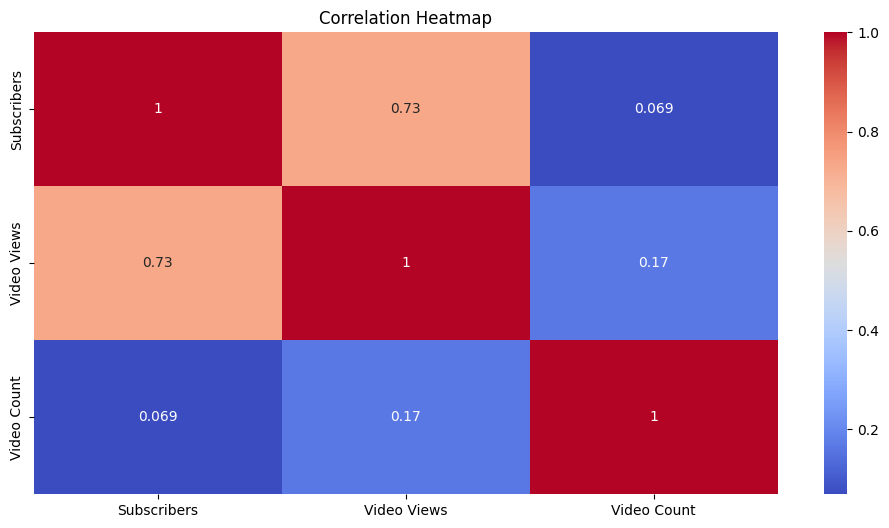

In [11]:

plt.figure(figsize=(12, 6))
sns.heatmap(df[['Subscribers', 'Video Views', 'Video Count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Word Cloud of Categories

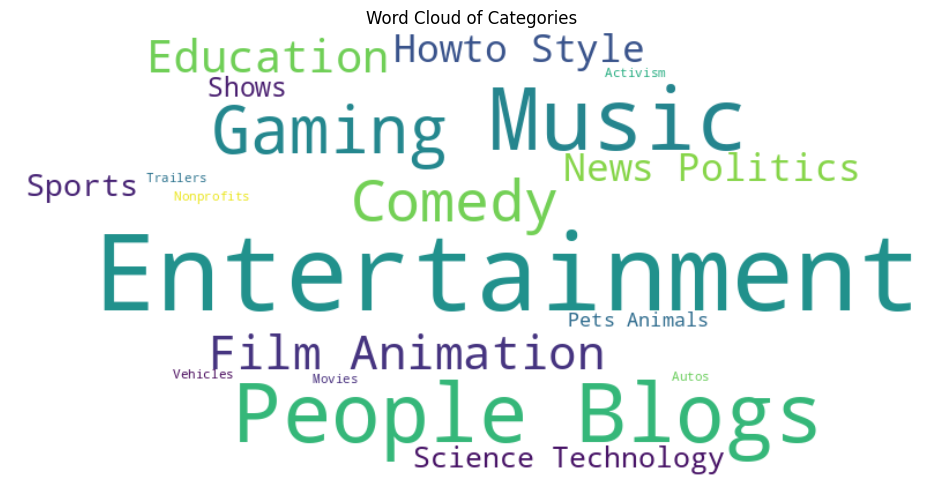

In [12]:

plt.figure(figsize=(12, 6))
text = ' '.join(df['Category'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()


### Distribution of Subscribers with Log Scale

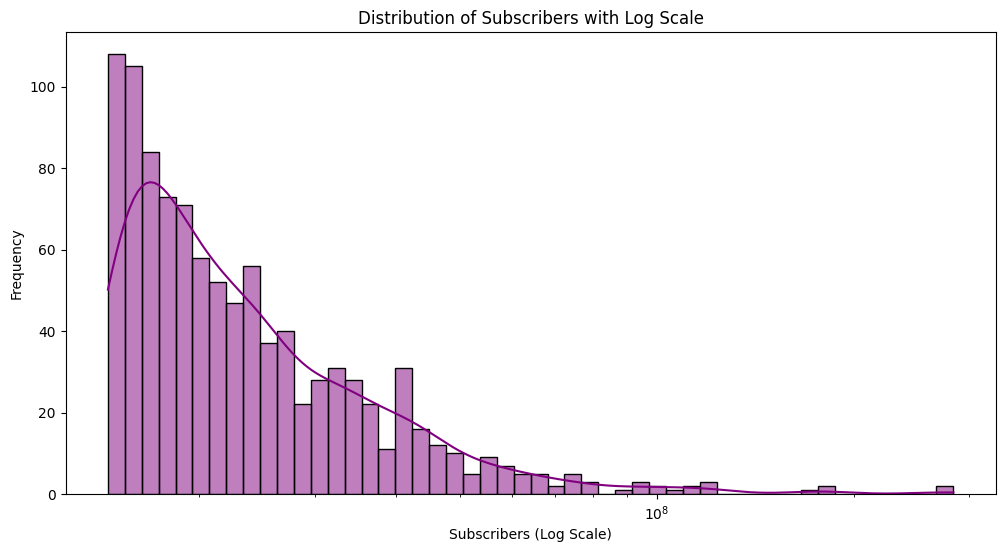

In [13]:

plt.figure(figsize=(12, 6))
sns.histplot(df['Subscribers'], bins=50, log_scale=True, kde=True, color='purple')
plt.title('Distribution of Subscribers with Log Scale')
plt.xlabel('Subscribers (Log Scale)')
plt.ylabel('Frequency')
plt.show()


### Subscribers to Video Views Ratio

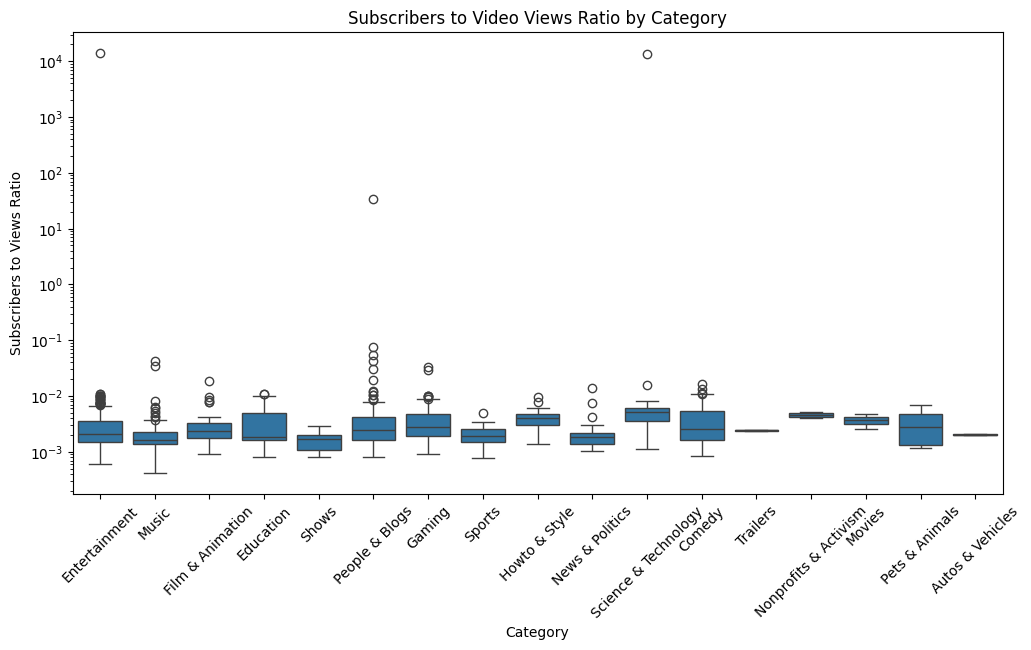

In [14]:

df['Subscribers_to_Views_Ratio'] = df['Subscribers'] / df['Video Views']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Subscribers_to_Views_Ratio', data=df)
plt.xticks(rotation=45)
plt.title('Subscribers to Video Views Ratio by Category')
plt.xlabel('Category')
plt.ylabel('Subscribers to Views Ratio')
plt.yscale('log')
plt.show()


### Subscribers Growth Over Time

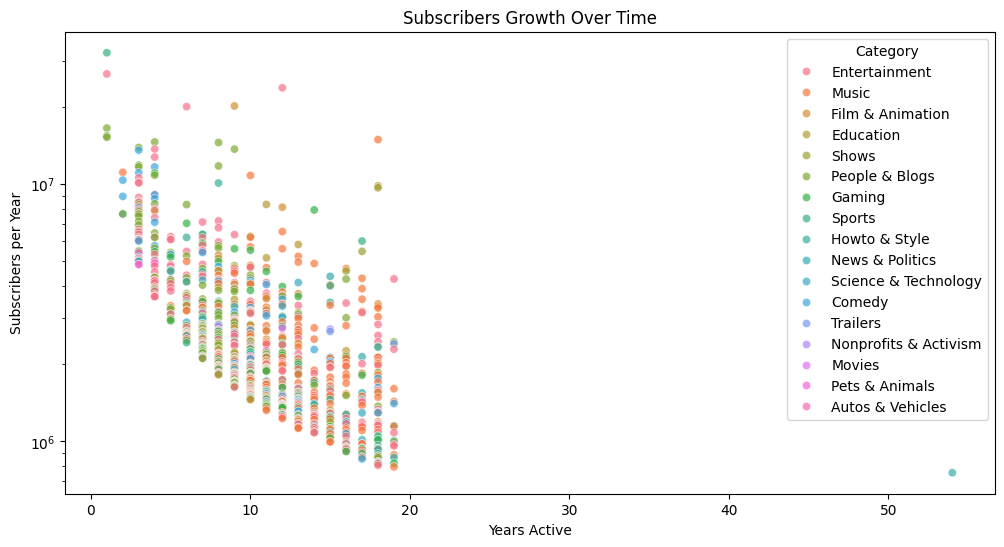

In [15]:

df['Years Active'] = 2024 - df['Started']
df['Subscribers per Year'] = df['Subscribers'] / df['Years Active']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Years Active', y='Subscribers per Year', data=df, hue='Category', alpha=0.7)
plt.title('Subscribers Growth Over Time')
plt.xlabel('Years Active')
plt.ylabel('Subscribers per Year')
plt.yscale('log')
plt.show()


## Summary

The analysis of the Top 1000 YouTube Channels dataset reveals several key insights:

1. **Popular Categories**: The most popular categories are Entertainment, Music, and Shows, with Entertainment having the highest number of channels.
2. **Correlation Analysis**: There is a strong correlation between the number of subscribers and video views, indicating that channels with more subscribers tend to have more video views.
3. **Growth Over Time**: The number of channels created each year has generally increased over time, with a noticeable spike in recent years.
4. **Top Channels**: MrBeast, T-Series, and YouTube Movies are the top 3 channels by subscribers, with MrBeast leading by a significant margin.
5. **Content Volume**: The distribution of video counts shows that most channels have uploaded a moderate number of videos, with few channels having an extremely high video count.
6. **Category Averages**: Categories like Music and Shows have the highest average subscribers and video views, indicating their strong appeal to audiences.
7. **Additional Analysis**: 
   - The correlation heatmap highlights significant relationships between key metrics.
   - The word cloud of categories visually emphasizes the prominence of popular categories.
   - The log scale distribution of subscribers provides a clearer view of the wide range of subscriber counts.
   - The ratio of subscribers to video views varies significantly across categories.
   - Subscriber growth over time analysis shows the rate at which channels gain subscribers relative to their years active.

## Conclusion

This dataset provides a comprehensive overview of the top-performing YouTube channels globally. The insights gained can help content creators, marketers, and researchers understand trends, content strategies, and audience engagement on YouTube. By analyzing factors such as category popularity, subscriber count, and video views, stakeholders can make informed decisions to enhance their presence and performance on the platform.

The predictive model for subscriber count based on video views, video count, and category demonstrates the potential for using machine learning to forecast channel growth. The model achieved a respectable R-squared value, indicating its effectiveness in capturing the relationship between these features and subscriber count. Future work could involve exploring more complex models and additional features to further improve predictive performance.